# Fraud Detection using Random Forest

In this notebook, we will use Logistic Regression for Fraud Detection using the dataset from https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022/data.

The content of this notebook is as follows: 

1. Set-up and Exploratory Data Analysis \
    1.1. Import Libraries \
    1.2. Exploratory Data Analysis (EDA) 

2. Preprocessing and Data Cleaning \
    2.1. One Hot Encoding and Standardization \
    2.2. Oversampling using SMOTE \
    2.3. Separation of Training and Test Sets 

3. Training of Models and Hyperparameter Tuning \
    3.1. Training using Random Forest \
    3.2. Model Prediction

4. Evaluation of Results and Error Analysis \
    4.1. Confusion Matrix \
    4.2. Compute Loss using Cross-Entropy Loss with Probabilities

# ***1. Set-up and Exploratory Data Analysis***

**1.1. Import Libraries**

In [26]:
import pandas as pd     
from imblearn.over_sampling import SMOTE 
import plotly.graph_objects as go  
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,log_loss, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler   
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree, export_graphviz
from graphviz import Source


**1.2. Exploratory Data Analysis (EDA)**

In [2]:
#Import the dataset and convert it into a pandas dataframe
rawData = pd.read_csv('Base.csv')
print("Shape of the raw data", rawData.shape) 

#Overview of data instances
rawData.head()

Shape of the raw data (1000000, 32)


,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [3]:
#Check data types
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [4]:
print(rawData.dtypes)

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [5]:
#Summary Statistics
rawData.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [6]:
colors = ['#004B87', 'LightBlue'] 
labels = ['Non-Fraud', 'Fraud']
values = rawData['fraud_bool'].value_counts() / rawData['fraud_bool'].shape[0]
total_normal = rawData[rawData['fraud_bool'] == False].shape[0]
total_fraudulent = rawData[rawData['fraud_bool'] == True].shape[0]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',  # Background color
    plot_bgcolor='white',   # Plot background color
    font_color='black',
)

fig.show()


# ***2. Preprocessing and Data Cleaning***

Observation: \
The dataset has a significant class imbalance by the large discrepancy between fraudulent and non-fraudulent transactions.

Approach: \
We will apply oversampling technique such as SMOTE. 

In [7]:
# rawData = pd.get_dummies(rawData)
X = rawData.drop('fraud_bool', axis=1)
y = rawData['fraud_bool'] 
# scaler = StandardScaler()

2.1. One Hot Encoding

In [8]:
#Get categorical features for One-hot Enconding
categorical_features = [x for x in X.columns if X[x].dtypes == "O"]
print(categorical_features)

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [9]:
X = pd.DataFrame(pd.get_dummies(X, prefix=categorical_features))

In [10]:
#Get numeric featues
numeric_features = X.select_dtypes(include=['number'])
non_numeric_features = X.select_dtypes(exclude=['number'])

#Scaling
scaler = StandardScaler()
scaled_numeric_features = scaler.fit_transform(numeric_features)
scaled_numeric_df = pd.DataFrame(scaled_numeric_features, columns=numeric_features.columns, index=X.index)
X_scaled = pd.concat([scaled_numeric_df, non_numeric_features], axis=1)

# Verify the DataFrame
print("Columns in X_scaled:", X_scaled.columns)

Columns in X_scaled: Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'credit_risk_score',
       'email_is_free', 'phone_home_valid', 'phone_mobile_valid',
       'bank_months_count', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'session_length_in_minutes', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month',
       'payment_type_AA', 'payment_type_AB', 'payment_type_AC',
       'payment_type_AD', 'payment_type_AE', 'employment_status_CA',
       'employment_status_CB', 'employment_status_CC', 'employment_status_CD',
       'employment_status_CE', 'employment_status_CF', 'employment_status_CG',
       'housing_status_BA', 'housing_status_BB', 'housing_status_BC'

In [11]:
X_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.0,-1.859206e-16,1.000001,-1.593620,-0.904778,0.128484,0.817326,1.161747
name_email_similarity,1000000.0,-1.801208e-16,1.000001,-1.707543,-0.928588,-0.005332,0.905745,1.751166
prev_address_months_count,1000000.0,-5.044853e-18,1.000001,-0.402272,-0.402272,-0.402272,-0.107128,8.315845
current_address_months_count,1000000.0,-5.121592e-17,1.000001,-0.990740,-0.764512,-0.391236,0.491051,3.861842
customer_age,1000000.0,2.421885e-16,1.000001,-1.969856,-1.138310,-0.306764,0.524782,4.682512
days_since_request,1000000.0,6.065548e-17,1.000001,-0.190587,-0.189250,-0.187767,-0.185694,14.387517
intended_balcon_amount,1000000.0,-1.108873e-16,1.000001,-1.195487,-0.486406,-0.469062,-0.181721,5.153918
zip_count_4w,1000000.0,-1.125500e-17,1.000001,-1.563291,-0.675064,-0.308037,0.369323,5.099901
velocity_6h,1000000.0,3.327614e-16,1.000001,-1.939237,-0.740661,-0.114817,0.669713,3.671943
velocity_24h,1000000.0,-1.518856e-16,1.000001,-2.345489,-0.795425,-0.013427,0.664403,3.202458


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42,stratify=y)

print('Training data shape:',X_train.shape)
print('Training ground truth values shape:',y_train.shape) 

print('Test data shape:',X_test.shape)
print('Test ground truth values shape:',y_test.shape)

Training data shape: (600000, 52)
Training ground truth values shape: (600000,)
Test data shape: (400000, 52)
Test ground truth values shape: (400000,)


2.2. Oversampling using SMOTE

In [14]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
print("Instances after oversampling in X", X_train.shape) 
print("Instances after oversampling in y", y_train.shape) 

Instances after oversampling in X (1186766, 52)
Instances after oversampling in y (1186766,)


In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404
velocity_24h,1000000.0,4769.781965,1479.212612,1.300307e+03,3593.179135,4749.921161,5752.574191,9506.896596


In [16]:
#Visualizing Class Distribution after SMOTE
colors = ['#004B87', 'LightBlue'] 
labels = ['Non-Fraud', 'Fraud']
values = y_train.value_counts() / y_train.shape[0] 

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='black', width=0.1)))

fig.update_layout(
    title_text='<b>Credit Card Fraud</b>',
    title_font_color='black',
    title_font=dict(size=24),
    legend_title_font_color='black',
    paper_bgcolor='white',  # Background color
    plot_bgcolor='white',   # Plot background color
    font_color='black',
)

fig.show()


2.3. Separation of Training and Test Sets

# ***3. Training of Models and Hyperparameter Tuning***

3.1. Hyperparameter Tuning using GridSearchCV and Training using Random Forest 

In [18]:
#Define the range of hyperparameters
hyperparameters = {
    'n_estimators': [5, 10, 15], 
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4], 
    'max_features': ['auto', 'sqrt'] 
}
 
randomForest = RandomForestClassifier(random_state=42)
 
random_search =  RandomizedSearchCV(
    estimator=randomForest,
    param_distributions=hyperparameters,
    n_iter=100,  #Number of parameter settings to sample
    cv=5,        #Number of cross-validation folds
    verbose=2,   #Control the verbosity of the output
    random_state=42,  #Seed for reproducibility
    n_jobs=-1    #Use all available cores
)
random_search.fit(X_train, y_train)   
 
print("Best parameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=  25.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=  25.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total time=  25.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=  26.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=  26.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=  27.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=5; total time=  27.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=5; total tim

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


255 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
206 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.

Best parameters:  {'n_estimators': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}
Best score:  0.9931798006808643


3.2. Model Prediction

In [19]:
y_train_pred = random_search.best_estimator_.predict(X_train) 

In [20]:
y_pred = random_search.best_estimator_.predict(X_test) 

# ***4. Evaluation of Results***

In [21]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")

Accuracy: 0.987055
Precision: 0.18709150326797386
Recall: 0.05190389845874887
F1 Score: 0.08126330731014904


In [22]:
print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
print(f"Precision: {precision_score(y_train, y_train_pred)}")
print(f"Recall: {recall_score(y_train, y_train_pred)}")
print(f"F1 Score: {f1_score(y_train, y_train_pred)}")

Accuracy: 0.9991843379402511
Precision: 0.999956115699271
Recall: 0.9984124924374308
F1 Score: 0.9991837078888561


4.1. Confusion matrix

In [23]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[593357     26]
 [   942 592441]]


In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[394593    995]
 [  4183    229]]


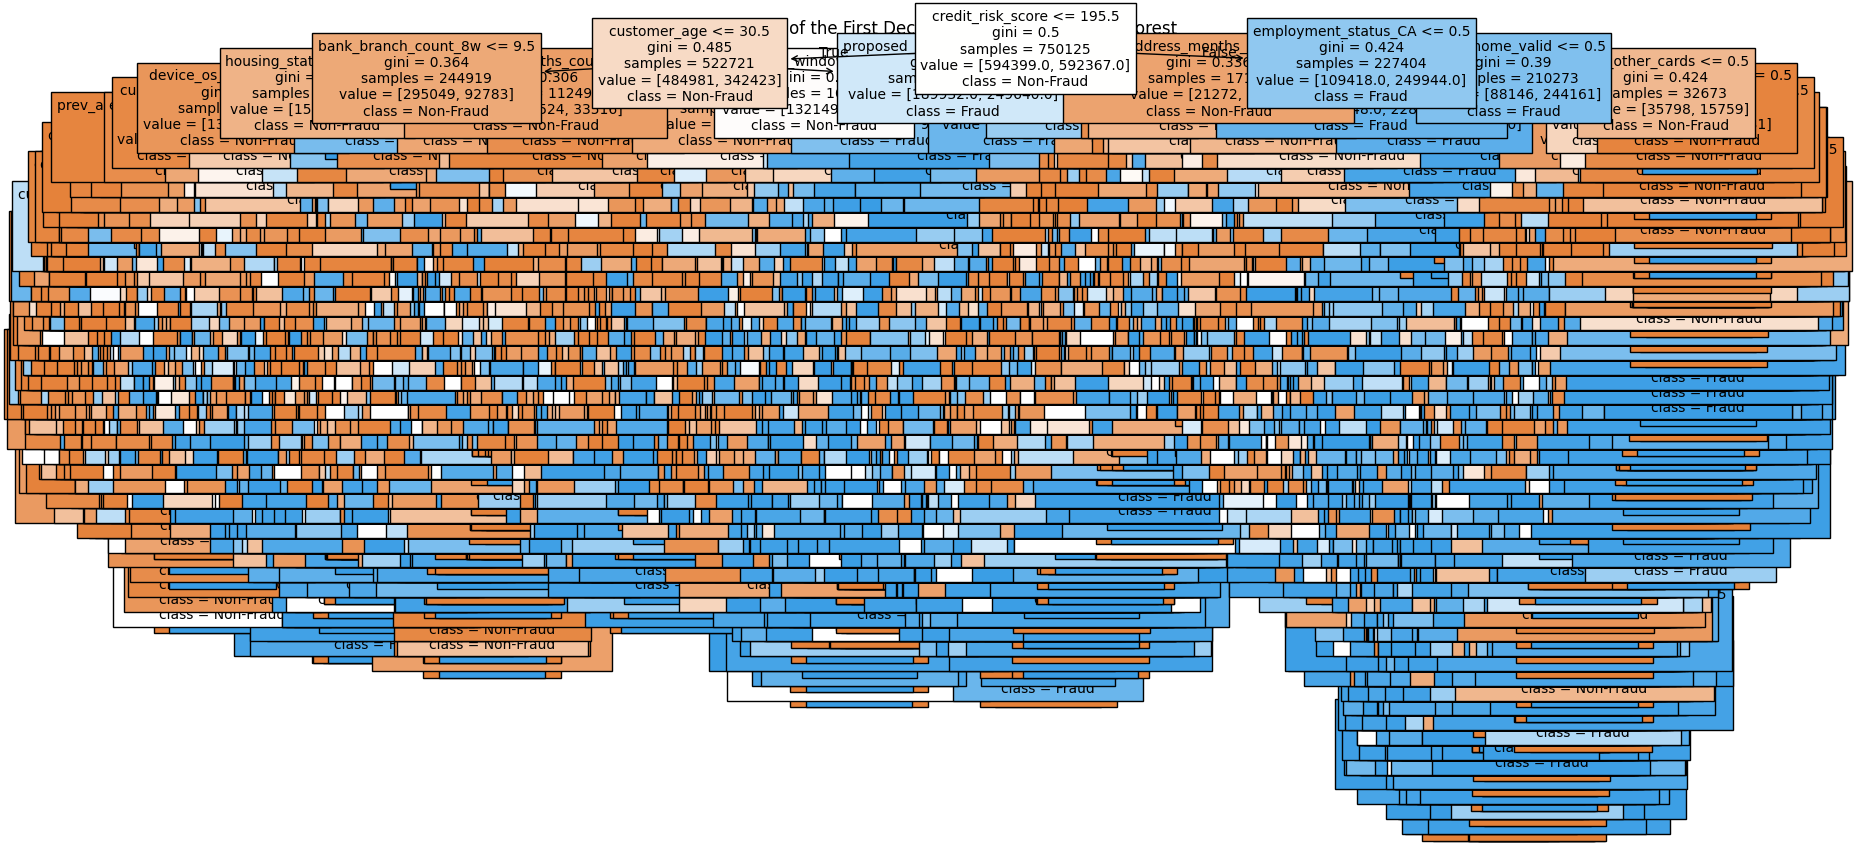

In [32]:
#Create the tree based on the selected parameters from Hyperparameter Tuning
tree = random_search.best_estimator_.estimators_[0]  

class_names = ['Non-Fraud', 'Fraud'] 

#Tree plot
plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=class_names, fontsize=10)
plt.title("Visualization of the First Decision Tree in the Random Forest")
plt.show()